In [15]:
import json, os, cv2, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, VGG16
from tensorflow.keras.optimizers import *

In [16]:
def training_model(model):
    """
    Function to training model
    """
    model.summary()
    model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    
    history = model.fit(train_generator,
            validation_data=validation_generator,
            epochs=250,
            verbose=2)
    
    plt.plot(history.history['accuracy'], label = 'train')
    plt.plot(history.history['val_accuracy'], label = 'val')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label = 'train')
    plt.plot(history.history['val_loss'], label = 'val')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    return model, history

In [17]:
def save_char_model(model_name, model, history):
    '''
    Save Model
    '''
    dir = f'./Character Recognition Model/75x75/{model_name}'
    try:
        os.makedirs(dir)
        print(f'SUCCESS CREATING {model_name} DIRECTORY')
    except:
        print('FOLDER ALREADY EXISTS')
    model.save(f'{dir}/model.h5')
    print('SUCCESS SAVING MODEL')
    with open(f'{dir}/history.json', 'w') as f:
        json.dump(history, f)
    print('SUCCESS SAVING HISTORY MODEL')

In [18]:
DATA_DIR = './CharDataset(Indo)'

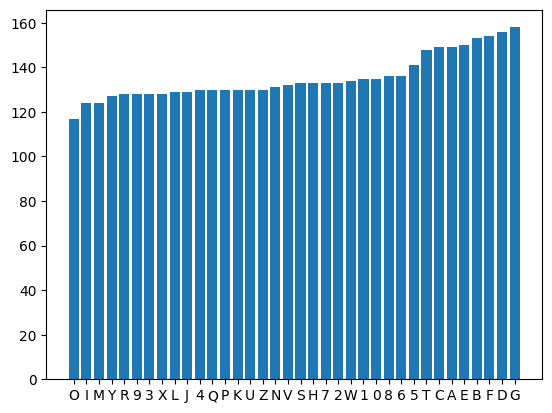

In [12]:
# See the distribution of data
count = {}
for character in os.listdir(DATA_DIR):
    count[character] = len(os.listdir(f'{DATA_DIR}/{character}'))
    
key = count.keys()
value = count.values()
df = pd.DataFrame({
    'Char': key,
    'Frequency': value,
})
df.sort_values(by='Frequency', inplace=True)

plt.bar(df.Char, df.Frequency)
plt.show()

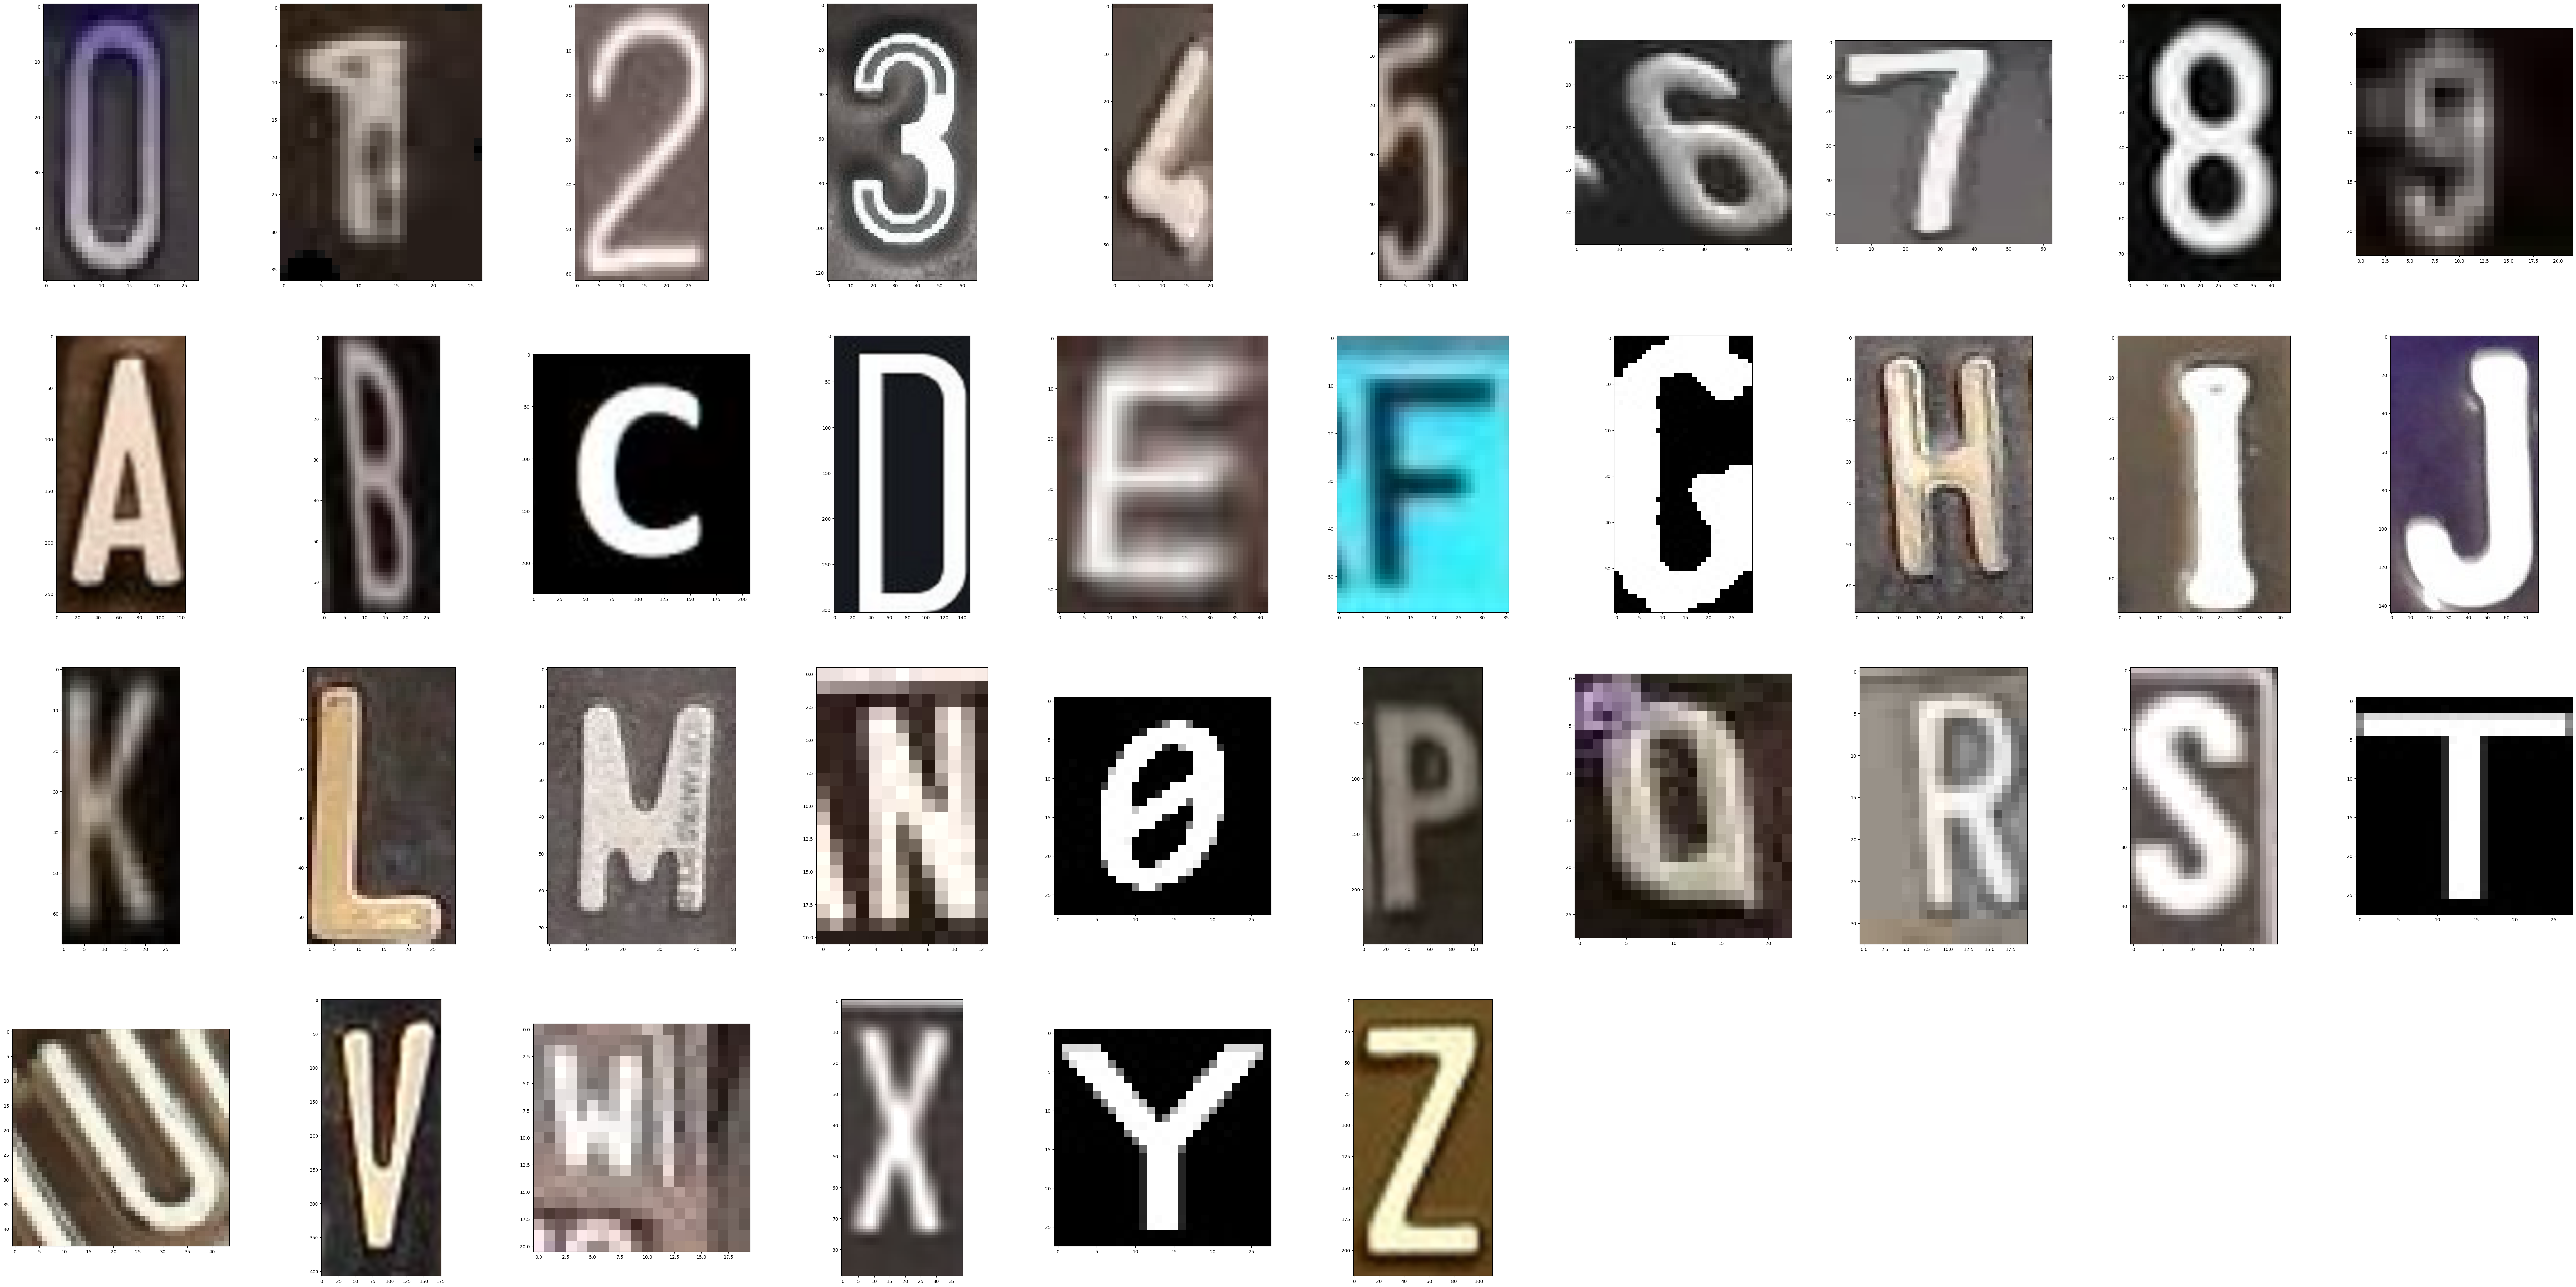

In [13]:
from random import seed, randint
seed(42)
plt.figure(figsize=(100,50))
for idx, folder in enumerate(sorted(os.listdir(DATA_DIR))):
    img = os.listdir(f'{DATA_DIR}/{folder}')[randint(0, 120)]
    path = f'{DATA_DIR}/{folder}/{img}'
    plt.subplot(4,10,idx+1)
    image = cv2.imread(path)
    plt.imshow(image)

In [15]:
training_datagen = ImageDataGenerator(validation_split=0.2,
                                      rescale = 1./255.,
                                      rotation_range = 3,
                                      brightness_range = (0.2,0.9))

train_generator = training_datagen.flow_from_directory(directory=DATA_DIR,
                                                     subset='training',
                                                     batch_size = 64,
                                                     class_mode = 'categorical',
                                                     target_size = (75, 75)
                                                     )

validation_generator = training_datagen.flow_from_directory(directory=DATA_DIR,
                                                            subset='validation',
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            target_size=(75, 75)
                                                            )

Found 3912 images belonging to 36 classes.
Found 959 images belonging to 36 classes.


# WITHOUT TRANSFER LARNING - 150 EPOCHS

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 16)        9232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 16)         0

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 - 52s - loss: 3.5830 - accuracy: 0.0348 - val_loss: 3.5764 - val_accuracy: 0.0365 - 52s/epoch - 840ms/step
Epoch 2/150
62/62 - 31s - loss: 3.5737 - accuracy: 0.0406 - val_loss: 3.5650 - val_accuracy: 0.0448 - 31s/epoch - 508ms/step
Epoch 3/150
62/62 - 34s - loss: 3.5509 - accuracy: 0.0524 - val_loss: 3.5202 - val_accuracy: 0.1043 - 34s/epoch - 550ms/step
Epoch 4/150
62/62 - 41s - loss: 3.4861 - accuracy: 0.0775 - val_loss: 3.3863 - val_accuracy: 0.1783 - 41s/epoch - 664ms/step
Epoch 5/150
62/62 - 41s - loss: 3.3423 - accuracy: 0.1178 - val_loss: 3.1572 - val_accuracy: 0.2534 - 41s/epoch - 655ms/step
Epoch 6/150
62/62 - 43s - loss: 3.1493 - accuracy: 0.1572 - val_loss: 2.9198 - val_accuracy: 0.3347 - 43s/epoch - 690ms/step
Epoch 7/150
62/62 - 41s - loss: 2.8965 - accuracy: 0.2311 - val_loss: 2.5627 - val_accuracy: 0.4442 - 41s/epoch - 660ms/step
Epoch 8/150
62/62 - 38s - loss: 2.6965 - accuracy: 0.2733 - val_loss: 2.3547 - val_accuracy: 0.5130 - 38s/epoch - 610ms/step
Epoch 9/150


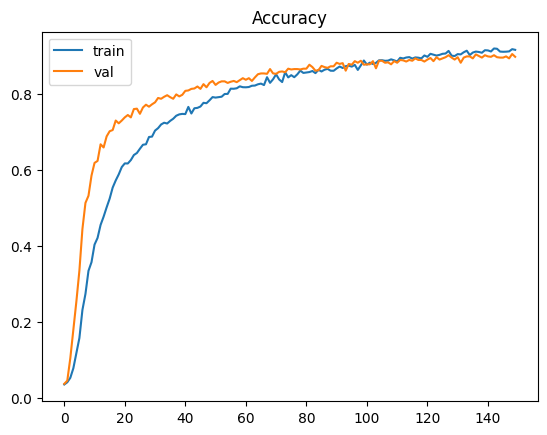

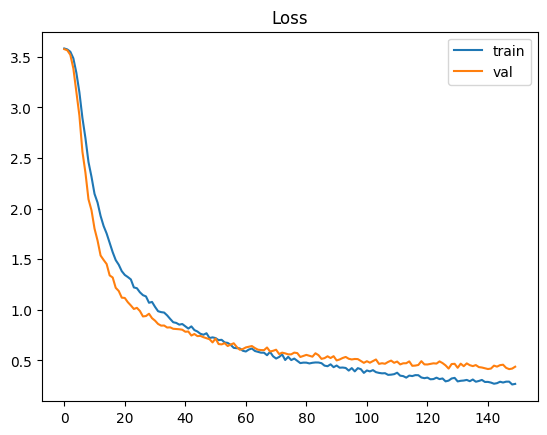

In [16]:
# Model Architecture
model5 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(75, 75, 3), padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(36, activation='softmax')
    ])

model5, history_model5 = training_model(model5)

In [17]:
save_char_model(model_name = "model5", model = model5, history = history_model5.history)

SUCCESS CREATING model5 DIRECTORY
SUCCESS SAVING MODEL
SUCCESS SAVING HISTORY MODEL


# VGG 16 TRANSFER LEARNING - 150 EPOCHS

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 - 69s - loss: 4.6174 - accuracy: 0.0340 - val_loss: 3.4523 - val_accuracy: 0.1074 - 69s/epoch - 1s/step
Epoch 2/150
62/62 - 117s - loss: 3.5830 - accuracy: 0.0583 - val_loss: 3.3835 - val_accuracy: 0.1794 - 117s/epoch - 2s/step
Epoch 3/150
62/62 - 117s - loss: 3.4540 - accuracy: 0.0841 - val_loss: 3.3239 - val_accuracy: 0.2325 - 117s/epoch - 2s/step
Epoch 4/150
62/62 - 117s - loss: 3.3207 - accuracy: 0.1056 - val_loss: 3.1879 - val_accuracy: 0.3264 - 117s/epoch - 2s/step
Epoch 5/150
62/62 - 117s - loss: 3.2052 - accuracy: 0.1296 - val_loss: 3.0346 - val_accuracy: 0.3921 - 117s/epoch - 2s/step
Epoch 6/150
62/62 - 158s - loss: 3.0388 - accuracy: 0.1784 - val_loss: 2.8391 - val_accuracy: 0.4713 - 158s/epoch - 3s/step
Epoch 7/150
62/62 - 132s - loss: 2.8499 - accuracy: 0.2142 - val_loss: 2.6211 - val_accuracy: 0.5308 - 132s/epoch - 2s/step
Epoch 8/150
62/62 - 116s - loss: 2.7098 - accuracy: 0.2464 - val_loss: 2.3873 - val_accuracy: 0.5965 - 116s/epoch - 2s/step
Epoch 9/150
62/62 - 11

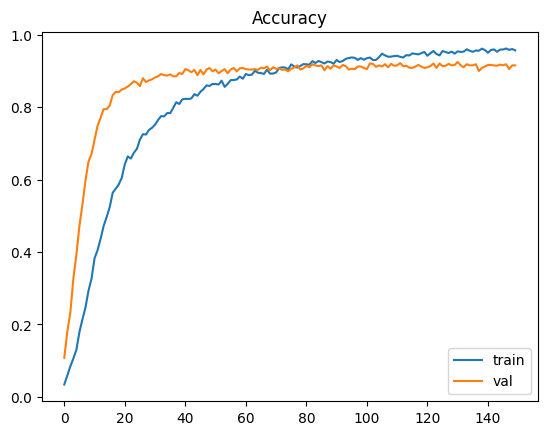

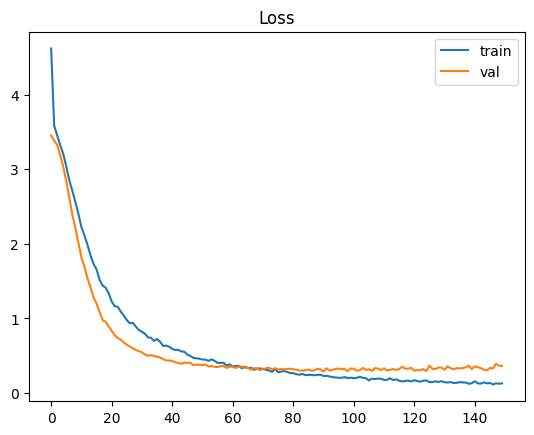

In [18]:
vgg16 = VGG16(input_shape = (75, 75, 3), 
            include_top = False, 
            weights = 'imagenet')

for layer in vgg16.layers:
    layer.trainable = False

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(vgg16.get_layer('block4_pool').output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(36, activation = 'softmax')(x)

model_vgg16 = tf.keras.Model(vgg16.input, x)

model_vgg16, history_vgg16 = training_model(model_vgg16)

In [23]:
save_char_model(model_name = "model_vgg16", model = model_vgg16, history = history_vgg16.history)

SUCCESS CREATING model_vgg16 DIRECTORY
SUCCESS SAVING MODEL
SUCCESS SAVING HISTORY MODEL


# VGG 19 - 150 EPOCHS

In [21]:
# pre_trained_model = tf.keras.applications.VGG19(input_shape = (75, 75, 3), 
#                                                 include_top = False, 
#                                                 weights = 'imagenet')

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0   

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 - 64s - loss: 6.4027 - accuracy: 0.0330 - val_loss: 3.5154 - val_accuracy: 0.0594 - 64s/epoch - 1s/step
Epoch 2/150
62/62 - 67s - loss: 3.9217 - accuracy: 0.0532 - val_loss: 3.4587 - val_accuracy: 0.0865 - 67s/epoch - 1s/step
Epoch 3/150
62/62 - 72s - loss: 3.7048 - accuracy: 0.0504 - val_loss: 3.4042 - val_accuracy: 0.1522 - 72s/epoch - 1s/step
Epoch 4/150
62/62 - 72s - loss: 3.5028 - accuracy: 0.0785 - val_loss: 3.3318 - val_accuracy: 0.2284 - 72s/epoch - 1s/step
Epoch 5/150
62/62 - 74s - loss: 3.4215 - accuracy: 0.0953 - val_loss: 3.2379 - val_accuracy: 0.3014 - 74s/epoch - 1s/step
Epoch 6/150
62/62 - 74s - loss: 3.2937 - accuracy: 0.1173 - val_loss: 3.1266 - val_accuracy: 0.3764 - 74s/epoch - 1s/step
Epoch 7/150
62/62 - 73s - loss: 3.1699 - accuracy: 0.1457 - val_loss: 2.9848 - val_accuracy: 0.4129 - 73s/epoch - 1s/step
Epoch 8/150
62/62 - 75s - loss: 2.9989 - accuracy: 0.1863 - val_loss: 2.7825 - val_accuracy: 0.4703 - 75s/epoch - 1s/step
Epoch 9/150
62/62 - 73s - loss: 2.86

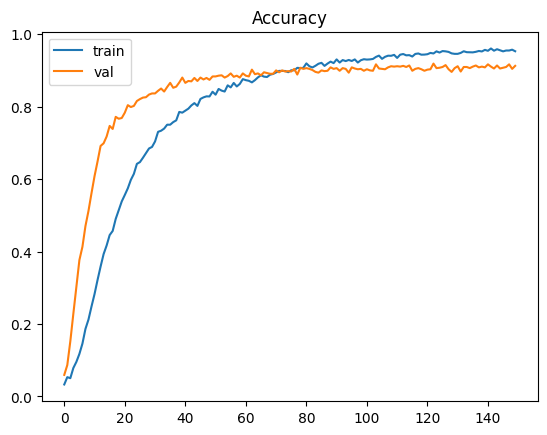

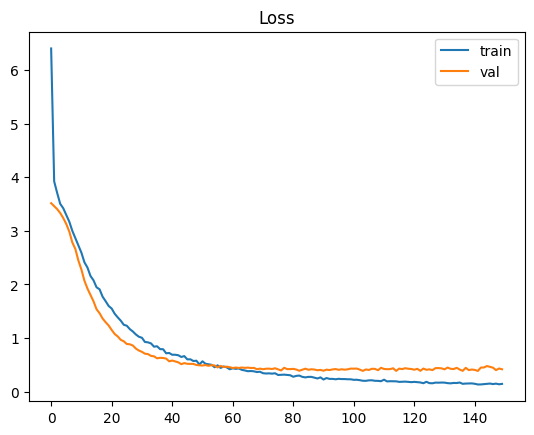

In [27]:
vgg19 = VGG19(input_shape = (75, 75, 3), 
            include_top = False, 
            weights = 'imagenet')


for layer in vgg19.layers:
    layer.trainable = False

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(vgg19.get_layer('block4_pool').output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(36, activation = 'softmax')(x)

model_vgg19 = tf.keras.Model(vgg19.input, x)

model_vgg19, history_vgg19 = training_model(model_vgg19)

In [28]:
save_char_model(model_name = "model_vgg19", model = model_vgg19, history = history_vgg19.history)

SUCCESS CREATING model_vgg19 DIRECTORY
SUCCESS SAVING MODEL
SUCCESS SAVING HISTORY MODEL


# COMPARE PERFORMANCE

In [42]:
def open_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

model5 = open_json('./CharacterRecognitionModel/75x75/model5/history.json')
model_vgg16 = open_json('./CharacterRecognitionModel/75x75/model_vgg16/history.json')
model_vgg19 = open_json('./CharacterRecognitionModel/75x75/model_vgg19/history.json')

In [46]:
def get_metrics(list_model):
    """
    Get Every Metrics from Model
    """
    acc, val_acc, loss, val_loss = {}, {}, {}, {}
    for i, model in enumerate(list_model):
        acc[f'model_{i}'] = model['accuracy']
        val_acc[f'model_{i}'] = model['val_accuracy']
        loss[f'model_{i}'] = model['loss']
        val_loss[f'model_{i}'] = model['val_loss']    

    return acc, val_acc, loss, val_loss

acc, val_acc, loss, val_loss = get_metrics([model5, model_vgg16, model_vgg19])

In [48]:
def get_metrics(list_model):
    """
    Get Every Metrics from Model
    """
    acc, val_acc, loss, val_loss = {}, {}, {}, {}
    for i, model in enumerate(list_model):
        acc[f'model_{i}'] = model['accuracy']
        val_acc[f'model_{i}'] = model['val_accuracy']
        loss[f'model_{i}'] = model['loss']
        val_loss[f'model_{i}'] = model['val_loss']    

    return acc, val_acc, loss, val_loss

acc, val_acc, loss, val_loss = get_metrics([model5, model_vgg16, model_vgg19])

<AxesSubplot: title={'center': 'Akurasi (Training Set)'}, xlabel='Epoch', ylabel='Akurasi'>

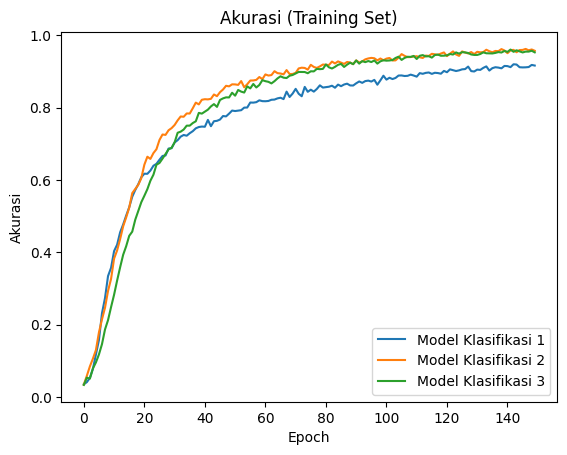

In [49]:
acc = pd.DataFrame(acc)
acc.columns = ['Model Klasifikasi 1', 'Model Klasifikasi 2', 'Model Klasifikasi 3']
acc.plot(title = 'Akurasi (Training Set)',
         xlabel = 'Epoch',
         ylabel = 'Akurasi')

<AxesSubplot: title={'center': 'Akurasi (Validation Set)'}, xlabel='Epoch', ylabel='Akurasi'>

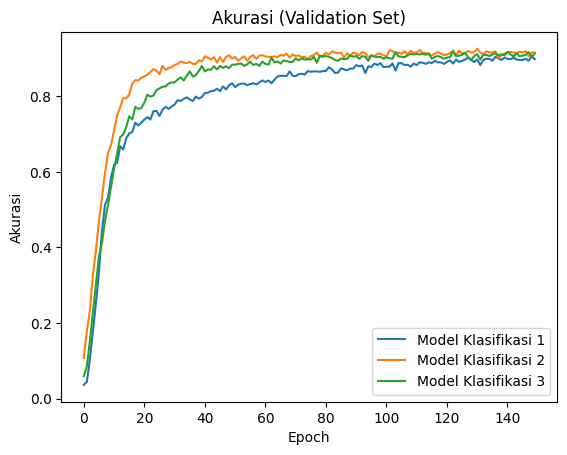

In [50]:
val_acc = pd.DataFrame(val_acc)
val_acc.columns = ['Model Klasifikasi 1', 'Model Klasifikasi 2', 'Model Klasifikasi 3']
val_acc.plot(title = 'Akurasi (Validation Set)',
         xlabel = 'Epoch',
         ylabel = 'Akurasi')

<AxesSubplot: title={'center': 'Loss (Training Set)'}, xlabel='Epochs', ylabel='loss'>

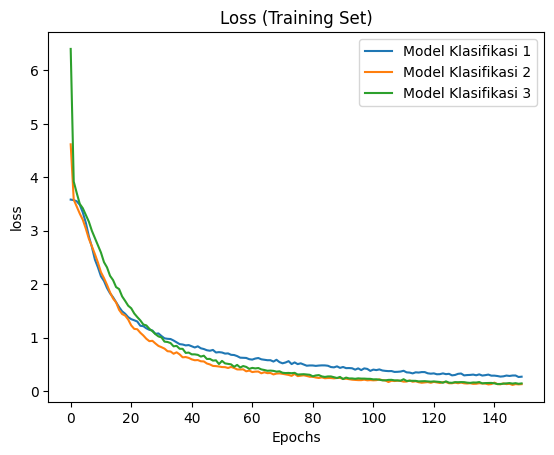

In [51]:
loss = pd.DataFrame(loss)
loss.columns = ['Model Klasifikasi 1', 'Model Klasifikasi 2', 'Model Klasifikasi 3']
loss.plot(title = 'Loss (Training Set)',
         xlabel = 'Epochs',
         ylabel = 'loss')

<AxesSubplot: title={'center': 'Loss (Validation Set)'}, xlabel='Epochs', ylabel='loss'>

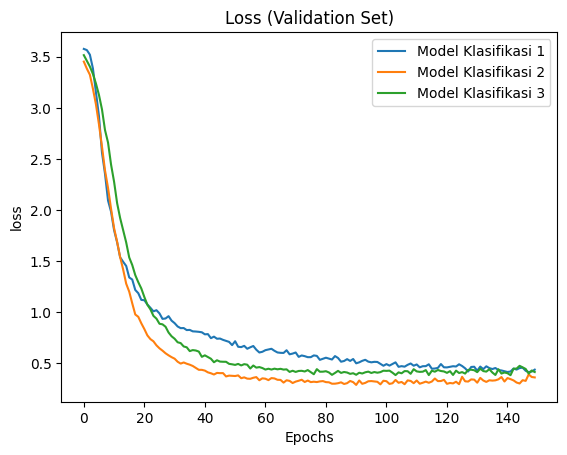

In [52]:
val_loss = pd.DataFrame(val_loss)
val_loss.columns = ['Model Klasifikasi 1', 'Model Klasifikasi 2', 'Model Klasifikasi 3']
val_loss.plot(title = 'Loss (Validation Set)',
         xlabel = 'Epochs',
         ylabel = 'loss')

In [53]:
last_acc = acc.tail(1).T
last_val_acc = val_acc.tail(1).T
last_loss = loss.tail(1).T
last_val_loss = val_loss.tail(1).T

In [54]:
# Metrics in Last Iteration
last_df = pd.concat([last_acc, last_val_acc, last_loss, last_val_loss], axis = 1)
last_df.columns = ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss']
last_df

,Accuracy,Val Accuracy,Loss,Val Loss
Model Klasifikasi 1,0.916155,0.897810,0.268813,0.438588
Model Klasifikasi 2,0.957055,0.915537,0.129154,0.362580
Model Klasifikasi 3,0.952710,0.912409,0.142939,0.415477


# TESTING

In [7]:
from PIL import Image
from tensorflow.keras.models import load_model



class ANPR:
    def __init__(self, character_model_path):
        self.char_model = load_model(character_model_path)

    def BinaryIoU_func(y_true, y_pred):
        pred = tf.where(y_pred>=0.5, 1, 0)
        pred = tf.cast(pred, dtype = tf.float32)
        true = tf.cast(y_true, dtype = tf.float32)
        n_true = tf.reduce_sum(true)
        n_pred = tf.reduce_sum(pred)
        intersection = tf.reduce_sum(pred * true)
        union = n_true + n_pred - intersection
        iou = intersection/union
        return iou


    def char_predict(self, img):
            mapping = {}
            CHARACTER = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
            for idx, c in enumerate(CHARACTER):
                mapping[idx] = c

            image_array = np.array(Image.fromarray(img).resize((75,75)).convert('RGB'))
            image_array = image_array[np.newaxis, ...]
            prediction = self.char_model.predict(image_array)
            idx = np.argmax(prediction)
            return mapping[idx]

    def identify_char(self, crop_img):
            list_char = ''
            image = crop_img.copy()
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
            kernel_erosion = np.ones((3,3), np.uint8)
            kernel_dilation = np.ones((3,3), np.uint8)
            img_erosion = cv2.erode(thresh,kernel_erosion,iterations = 1)
            img_dilation = cv2.dilate(img_erosion, kernel_dilation, iterations=2)
            #find contours
            ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            # #sort contours
            sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

            area = list(map(lambda x: cv2.contourArea(x), ctrs))
            threshold_area = np.quantile(area, 0.25)

            for i, ctr in enumerate(ctrs):
                if hier[0,i,3] == -1:
                    # Get bounding box
                    x, y, w, h = cv2.boundingRect(ctr)

                    if (w > h) or (area[i] < 300):
                        continue

                    calon_img = image[y:y+h, x:x+w, :]
                    class_char = self.char_predict(calon_img)
                    cv2.rectangle(image,(x,y),( x + w, y + h ),(0,255,0),2)
                    cv2.putText(image, f'{class_char}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0), 1)
                    list_char += class_char

            return {'images': image, 'character': list_char}


    def predict_all(self, image_path):
            image = cv2.imread(image_path)
            OUTPUT = self.identify_char(image)
            return OUTPUT



In [8]:
anpr = ANPR('./CharacterRecognitionModel/75x75/model_vgg16/model.h5')

1/1 [==============================] - 0s 79ms/step
1126J1B16MB1J


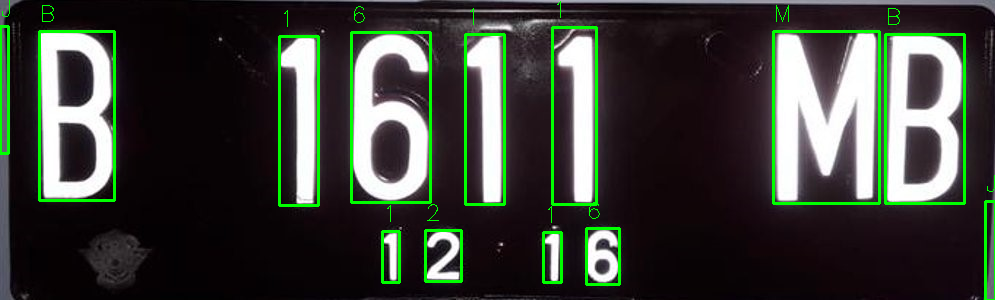

In [12]:
result = anpr.predict_all('B1611MB.jpg')
print(result['character'])

Image.fromarray(result['images'])

 # ITERASI 2 

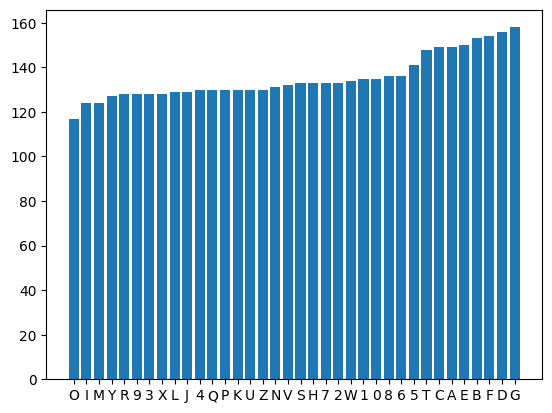

In [19]:
# See the distribution of data
count = {}
for character in os.listdir(DATA_DIR):
    count[character] = len(os.listdir(f'{DATA_DIR}/{character}'))
    
key = count.keys()
value = count.values()
df = pd.DataFrame({
    'Char': key,
    'Frequency': value,
})
df.sort_values(by='Frequency', inplace=True)

plt.bar(df.Char, df.Frequency)
plt.show()

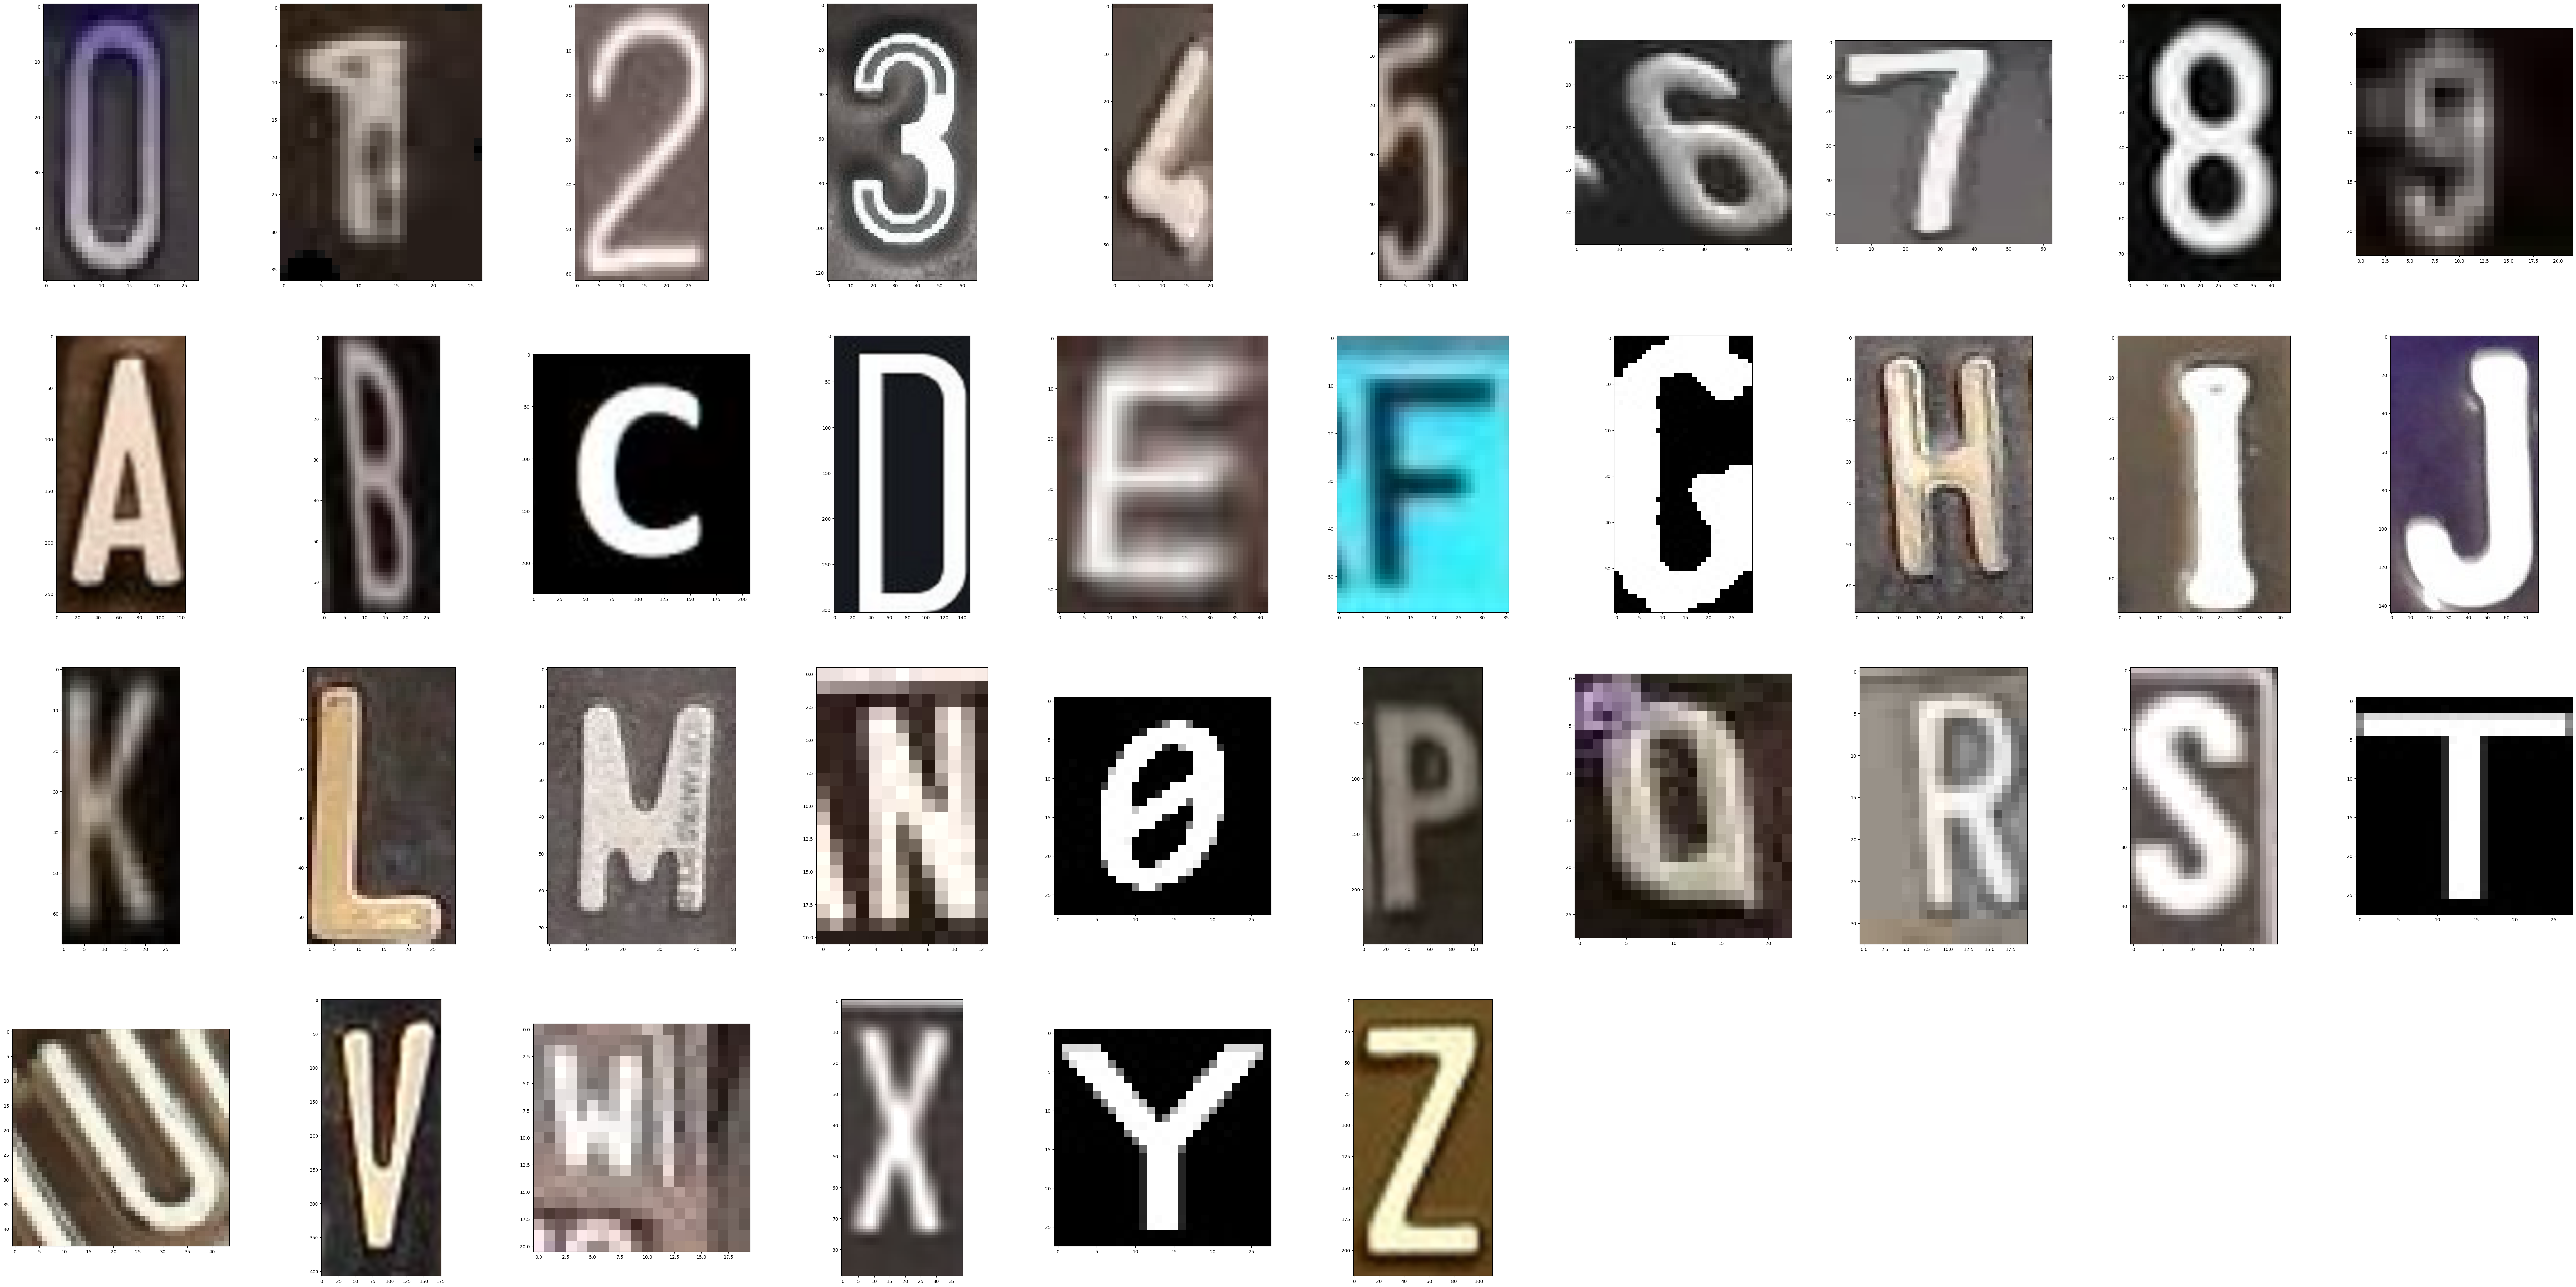

In [20]:
from random import seed, randint
seed(42)
plt.figure(figsize=(100,50))
for idx, folder in enumerate(sorted(os.listdir(DATA_DIR))):
    img = os.listdir(f'{DATA_DIR}/{folder}')[randint(0, 120)]
    path = f'{DATA_DIR}/{folder}/{img}'
    plt.subplot(4,10,idx+1)
    image = cv2.imread(path)
    plt.imshow(image)

In [21]:
training_datagen = ImageDataGenerator(validation_split=0.2,
                                      rescale = 1./255.,
                                      rotation_range = 3,
                                      brightness_range = (0.2,0.9))

train_generator = training_datagen.flow_from_directory(directory=DATA_DIR,
                                                     subset='training',
                                                     batch_size = 64,
                                                     class_mode = 'categorical',
                                                     target_size = (75, 75)
                                                     )

validation_generator = training_datagen.flow_from_directory(directory=DATA_DIR,
                                                            subset='validation',
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            target_size=(75, 75)
                                                            )

Found 3912 images belonging to 36 classes.
Found 959 images belonging to 36 classes.


# WITHOUT TRANSFER LEARNING - 250 EPOCHS

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 16)        9232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 16)         0

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 - 41s - loss: 3.5819 - accuracy: 0.0325 - val_loss: 3.5777 - val_accuracy: 0.0532 - 41s/epoch - 669ms/step
Epoch 2/250
62/62 - 74s - loss: 3.5755 - accuracy: 0.0406 - val_loss: 3.5660 - val_accuracy: 0.1043 - 74s/epoch - 1s/step
Epoch 3/250
62/62 - 76s - loss: 3.5460 - accuracy: 0.0562 - val_loss: 3.5024 - val_accuracy: 0.1356 - 76s/epoch - 1s/step
Epoch 4/250
62/62 - 75s - loss: 3.4667 - accuracy: 0.0851 - val_loss: 3.3343 - val_accuracy: 0.2461 - 75s/epoch - 1s/step
Epoch 5/250
62/62 - 74s - loss: 3.2908 - accuracy: 0.1288 - val_loss: 3.0071 - val_accuracy: 0.3222 - 74s/epoch - 1s/step
Epoch 6/250
62/62 - 75s - loss: 2.9908 - accuracy: 0.2111 - val_loss: 2.6470 - val_accuracy: 0.4411 - 75s/epoch - 1s/step
Epoch 7/250
62/62 - 76s - loss: 2.7445 - accuracy: 0.2549 - val_loss: 2.3353 - val_accuracy: 0.5005 - 76s/epoch - 1s/step
Epoch 8/250
62/62 - 75s - loss: 2.5525 - accuracy: 0.2973 - val_loss: 2.1267 - val_accuracy: 0.5443 - 75s/epoch - 1s/step
Epoch 9/250
62/62 - 76s - loss: 2

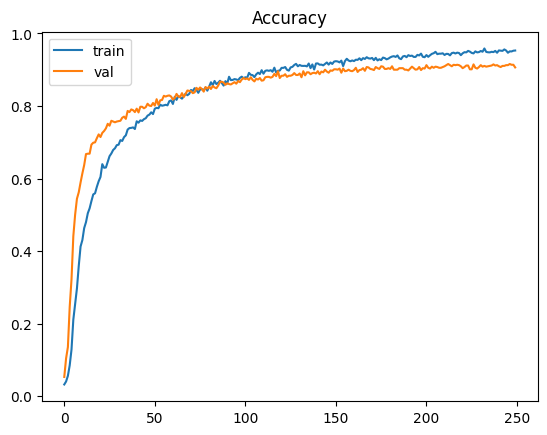

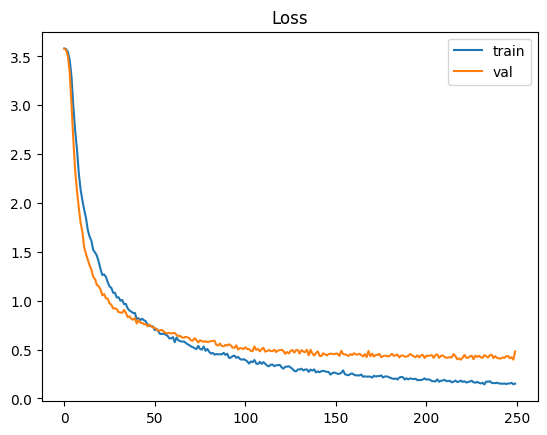

In [22]:
# Model Architecture
model11 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(75, 75, 3), padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(36, activation='softmax')
    ])

model11, history_model11 = training_model(model11)

In [24]:
save_char_model(model_name = "model11", model = model11, history = history_model11.history)

SUCCESS CREATING model11 DIRECTORY
SUCCESS SAVING MODEL
SUCCESS SAVING HISTORY MODEL


# VGG 16 TRANSFER LEARNING

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 - 55s - loss: 4.4306 - accuracy: 0.0322 - val_loss: 3.4920 - val_accuracy: 0.0907 - 55s/epoch - 889ms/step
Epoch 2/250
62/62 - 58s - loss: 3.5423 - accuracy: 0.0593 - val_loss: 3.4323 - val_accuracy: 0.1554 - 58s/epoch - 928ms/step
Epoch 3/250
62/62 - 61s - loss: 3.4374 - accuracy: 0.0800 - val_loss: 3.3360 - val_accuracy: 0.2440 - 61s/epoch - 986ms/step
Epoch 4/250
62/62 - 62s - loss: 3.3197 - accuracy: 0.0961 - val_loss: 3.1998 - val_accuracy: 0.3306 - 62s/epoch - 995ms/step
Epoch 5/250
62/62 - 61s - loss: 3.1406 - accuracy: 0.1429 - val_loss: 2.9931 - val_accuracy: 0.4192 - 61s/epoch - 989ms/step
Epoch 6/250
62/62 - 62s - loss: 2.9683 - accuracy: 0.1871 - val_loss: 2.7342 - val_accuracy: 0.4849 - 62s/epoch - 1s/step
Epoch 7/250
62/62 - 62s - loss: 2.7631 - accuracy: 0.2326 - val_loss: 2.4435 - val_accuracy: 0.5902 - 62s/epoch - 995ms/step
Epoch 8/250
62/62 - 62s - loss: 2.6284 - accuracy: 0.2561 - val_loss: 2.2768 - val_accuracy: 0.6350 - 62s/epoch - 993ms/step
Epoch 9/250
62/

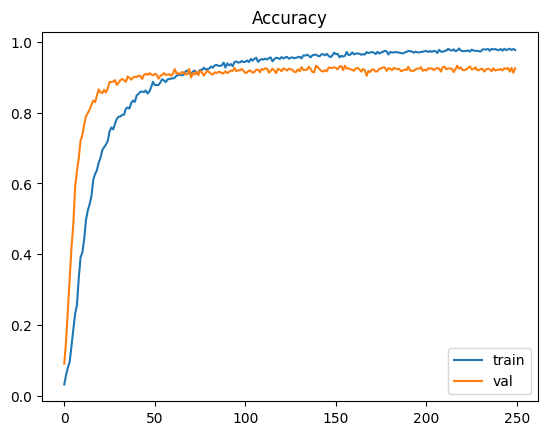

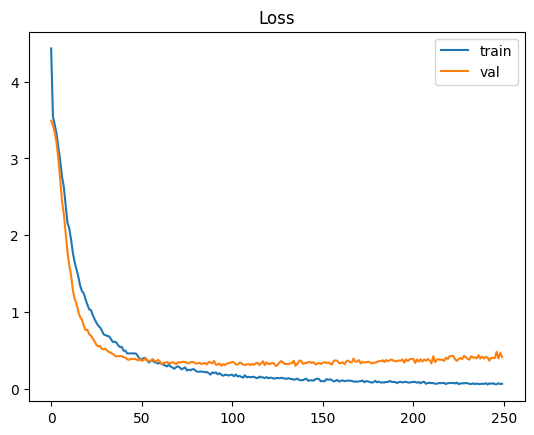

In [25]:
vgg16_2 = VGG16(input_shape = (75, 75, 3), 
            include_top = False, 
            weights = 'imagenet')

for layer in vgg16_2.layers:
    layer.trainable = False

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(vgg16_2.get_layer('block4_pool').output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(36, activation = 'softmax')(x)

model_vgg16_2 = tf.keras.Model(vgg16_2.input, x)

model_vgg16_2, history_vgg16_2 = training_model(model_vgg16_2)